# Продуктовый анализ бразильского маркетплейса

In [1]:
import pandas as pd
from operator import attrgetter
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import colors as mcolors
import numpy as np

### Выгрузка и предварительный анализ данных

In [2]:
customers_df = pd.read_csv('olist_customers_dataset.csv')
items_df = pd.read_csv('olist_order_items_dataset.csv')
orders_df = pd.read_csv('olist_orders_dataset.csv')

In [3]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [4]:
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [5]:
items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [6]:
items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [7]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [8]:
orders_df.isna() \
         .sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [9]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [ ]:
# преобразую формат данных в столбцах с датами

In [10]:
items_df['shipping_limit_date'] = pd.to_datetime(items_df['shipping_limit_date'])

In [11]:
orders_df[['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']] = orders_df[['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']].apply(lambda x: pd.to_datetime(x, format='%Y-%m-%d'))

In [ ]:
# объединяю датафреймы для дальнейшей работы

In [12]:
df = pd.merge(customers_df,orders_df, how = 'left', on = 'customer_id')
df = pd.merge(df, items_df, how = 'left', on = 'order_id')

In [13]:
df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,1.0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,1.0,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,1.0,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,1.0,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,1.0,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25


In [14]:
df.isna().sum()

customer_id                         0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
order_id                            0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 161
order_delivered_carrier_date     1968
order_delivered_customer_date    3229
order_estimated_delivery_date       0
order_item_id                     775
product_id                        775
seller_id                         775
shipping_limit_date               775
price                             775
freight_value                     775
dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113425 entries, 0 to 113424
Data columns (total 18 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_id                    113425 non-null  object        
 1   customer_unique_id             113425 non-null  object        
 2   customer_zip_code_prefix       113425 non-null  int64         
 3   customer_city                  113425 non-null  object        
 4   customer_state                 113425 non-null  object        
 5   order_id                       113425 non-null  object        
 6   order_status                   113425 non-null  object        
 7   order_purchase_timestamp       113425 non-null  datetime64[ns]
 8   order_approved_at              113264 non-null  datetime64[ns]
 9   order_delivered_carrier_date   111457 non-null  datetime64[ns]
 10  order_delivered_customer_date  110196 non-null  datetime64[ns]
 11  

In [ ]:
# создаю копию данных, чтобы избежать изменений в исходном DataFrame

In [16]:
df_copy = df.copy()

### Когортный анализ

<span style="font-size: 18px;">
Задачи:
    
- построить и оценить месячный retention;
- проанализировать, чему равен медианный retention 1-го месяца;
- найти когорту с самым высоким retention на 3-й месяц;
- проиллюстрировать результаты релевантной визуализацией.
</span>

<span style="font-size: 18px;">Для расчёта retention в оформление заказа отбираю только успешные заказы со статусом 'delivered'.</span>

In [17]:
df_copy['order_period'] = df_copy['order_delivered_customer_date'].dt.to_period('M')
df_copy['order_period_day'] = df_copy['order_delivered_customer_date'].dt.to_period('D')

In [18]:
df_copy['cohort'] = df_copy.groupby('customer_unique_id')['order_delivered_customer_date'] \
                           .transform('min') \
                           .dt.to_period('M')
df_copy['cohort_day'] = df_copy.groupby('customer_unique_id')['order_delivered_customer_date'] \
                            .transform('min') \
                            .dt.to_period('D')

In [19]:
success_orders = df_copy.query('order_status == "delivered"') \
                        .order_id.tolist() 

In [20]:
df_copy = df_copy[df_copy['order_id'].isin(success_orders)]

In [21]:
df_copy = df_copy.drop_duplicates()

In [22]:
df_copy.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,order_period,order_period_day,cohort,cohort_day
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,1.0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,2017-05,2017-05-25,2017-05,2017-05-25
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,1.0,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48,2018-01,2018-01-29,2018-01,2018-01-29
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,1.0,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,2018-06,2018-06-14,2018-06,2018-06-14
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,1.0,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36,2018-03,2018-03-28,2018-03,2018-03-28
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,1.0,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25,2018-08,2018-08-09,2018-08,2018-08-09


In [23]:
df_copy.customer_unique_id.count()

110197

In [ ]:
# извлекаю месяц и день заказа

In [ ]:
# присваиваю когорты на основе даты первого успешного заказа для каждого покупателя

In [24]:
df_copy.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,order_period,order_period_day,cohort,cohort_day
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,1.0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,2017-05,2017-05-25,2017-05,2017-05-25
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,1.0,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48,2018-01,2018-01-29,2018-01,2018-01-29
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,1.0,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,2018-06,2018-06-14,2018-06,2018-06-14
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,1.0,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36,2018-03,2018-03-28,2018-03,2018-03-28
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,1.0,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25,2018-08,2018-08-09,2018-08,2018-08-09


In [ ]:
# рассчитываю номер периода в днях (месячные периоды, деля на 30)

In [25]:
df_copy = df_copy.dropna()

In [26]:
df_copy['period_number_month'] = np.floor((df_copy.order_period_day - df_copy.cohort_day) \
                                    .apply(attrgetter('n')) / 30)

In [ ]:
# агрегирую данные по когортам и рассчитанному номеру периода (в месяцах)

In [27]:
df_cohort = df_copy.groupby(['cohort', 'period_number_month']) \
                   .agg(n_customers=('customer_unique_id', 'nunique')) \
                   .reset_index()

In [28]:
df_cohort.head()

,cohort,period_number_month,n_customers
0,2016-10,0.0,203
1,2016-10,1.0,1
2,2016-10,6.0,1
3,2016-10,9.0,1
4,2016-10,11.0,1


In [ ]:
# создаю сводную таблицу для когортного анализа

In [29]:
cohort_pivot = df_cohort.pivot_table(index='cohort', columns='period_number_month', values='n_customers')

In [30]:
cohort_pivot.head()

period_number_month,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0
cohort,,,,,,,,,,,,,,,,,,,,,
2016-10,203.0,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,...,1.0,NaN,1.0,NaN,1.0,NaN,1.0,1.0,1.0,2.0
2016-11,57.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-12,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01,262.0,1.0,NaN,1.0,1.0,1.0,1.0,NaN,NaN,1.0,...,2.0,1.0,1.0,NaN,NaN,1.0,1.0,NaN,1.0,NaN
2017-02,1324.0,2.0,2.0,8.0,1.0,2.0,2.0,2.0,1.0,2.0,...,5.0,3.0,2.0,2.0,1.0,2.0,2.0,NaN,NaN,NaN


In [ ]:
# рассчитываю размеры когорт (первый столбец сводной таблицы)

In [31]:
cohort_size = cohort_pivot.iloc[:, 0]

In [ ]:
# вычисляю коэффициенты удержания, деля на размер когорты

In [32]:
retention_matrix = cohort_pivot.divide(cohort_size, axis=0) \
                               .apply(lambda x: x * 100) # в %

In [33]:
retention_matrix.head()

period_number_month,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0
cohort,,,,,,,,,,,,,,,,,,,,,
2016-10,100.0,0.492611,NaN,NaN,NaN,NaN,0.492611,NaN,NaN,0.492611,...,0.492611,NaN,0.492611,NaN,0.492611,NaN,0.492611,0.492611,0.492611,0.985222
2016-11,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-12,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01,100.0,0.381679,NaN,0.381679,0.381679,0.381679,0.381679,NaN,NaN,0.381679,...,0.763359,0.381679,0.381679,NaN,NaN,0.381679,0.381679,NaN,0.381679,NaN
2017-02,100.0,0.151057,0.151057,0.604230,0.075529,0.151057,0.151057,0.151057,0.075529,0.151057,...,0.377644,0.226586,0.151057,0.151057,0.075529,0.151057,0.151057,NaN,NaN,NaN


<span style="font-size: 18px;">Ниже представлена тепловая карта когортного анализа.</span>

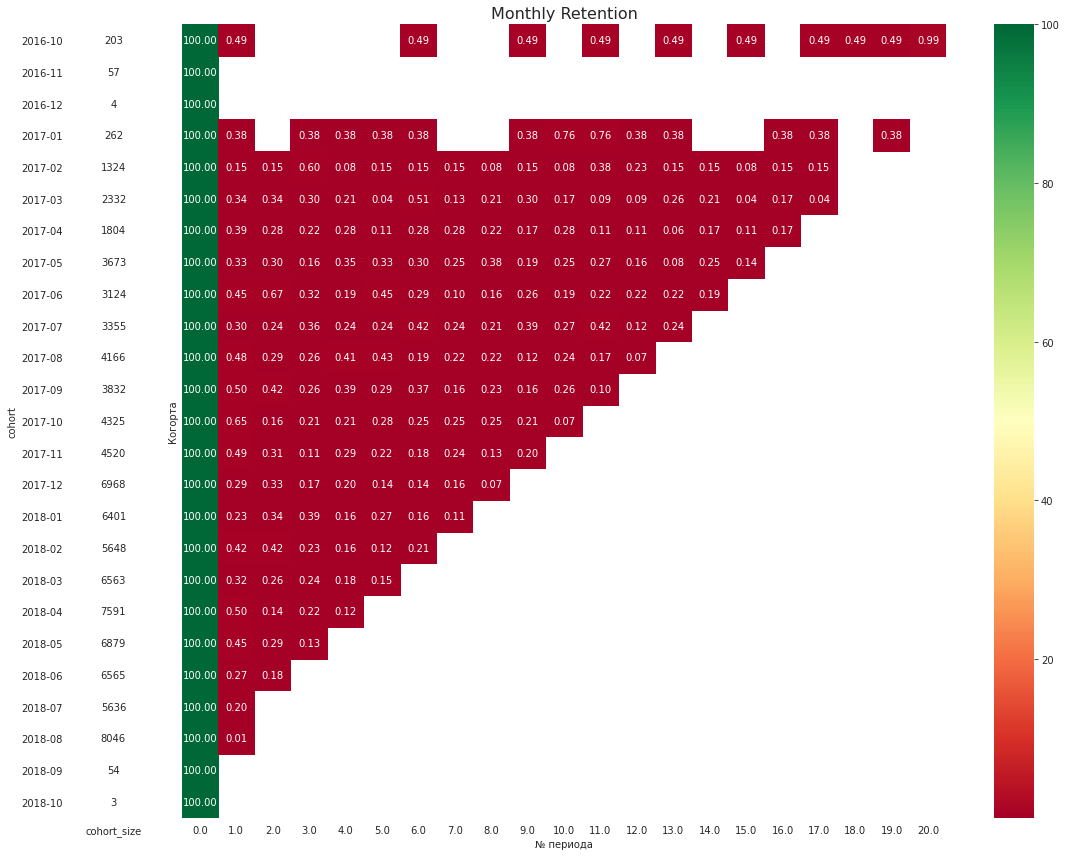

In [34]:
with sns.axes_style("white"):
    fig, ax = plt.subplots(1, 2, figsize=(16, 12), sharey=True, gridspec_kw={'width_ratios': [1, 11]})

    # Тепловая карта для коэффициентов удержания
    sns.heatmap(retention_matrix,
                mask=retention_matrix.isnull(),
                annot=True,
                fmt='.2f',
                cmap='RdYlGn',
                ax=ax[1])
    ax[1].set_title('Monthly Retention', fontsize=16)
    ax[1].set(xlabel='№ периода', ylabel='Когорта')

    # Тепловая карта для размеров когорт
    cohort_size_df = pd.DataFrame(cohort_size).rename(columns={0: 'cohort_size'})
    white_cmap = mcolors.ListedColormap(['white'])
    sns.heatmap(cohort_size_df,
                annot=True,
                cbar=False,
                fmt='g',
                cmap=white_cmap,
                ax=ax[0])

    fig.tight_layout()
    plt.show()

<span style="font-size: 18px;"> В связи с очень низкими значениями retention в следующие месяцы после совершения первого заказа исключаю нулевой месяц, чтобы визуализация была более наглядной.</span>

In [35]:
retention_matrix_fixed = retention_matrix.iloc[:,1:21] # в %
retention_matrix_fixed.head()

period_number_month,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0
cohort,,,,,,,,,,,,,,,,,,,,
2016-10,0.492611,NaN,NaN,NaN,NaN,0.492611,NaN,NaN,0.492611,NaN,0.492611,NaN,0.492611,NaN,0.492611,NaN,0.492611,0.492611,0.492611,0.985222
2016-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01,0.381679,NaN,0.381679,0.381679,0.381679,0.381679,NaN,NaN,0.381679,0.763359,0.763359,0.381679,0.381679,NaN,NaN,0.381679,0.381679,NaN,0.381679,NaN
2017-02,0.151057,0.151057,0.604230,0.075529,0.151057,0.151057,0.151057,0.075529,0.151057,0.075529,0.377644,0.226586,0.151057,0.151057,0.075529,0.151057,0.151057,NaN,NaN,NaN


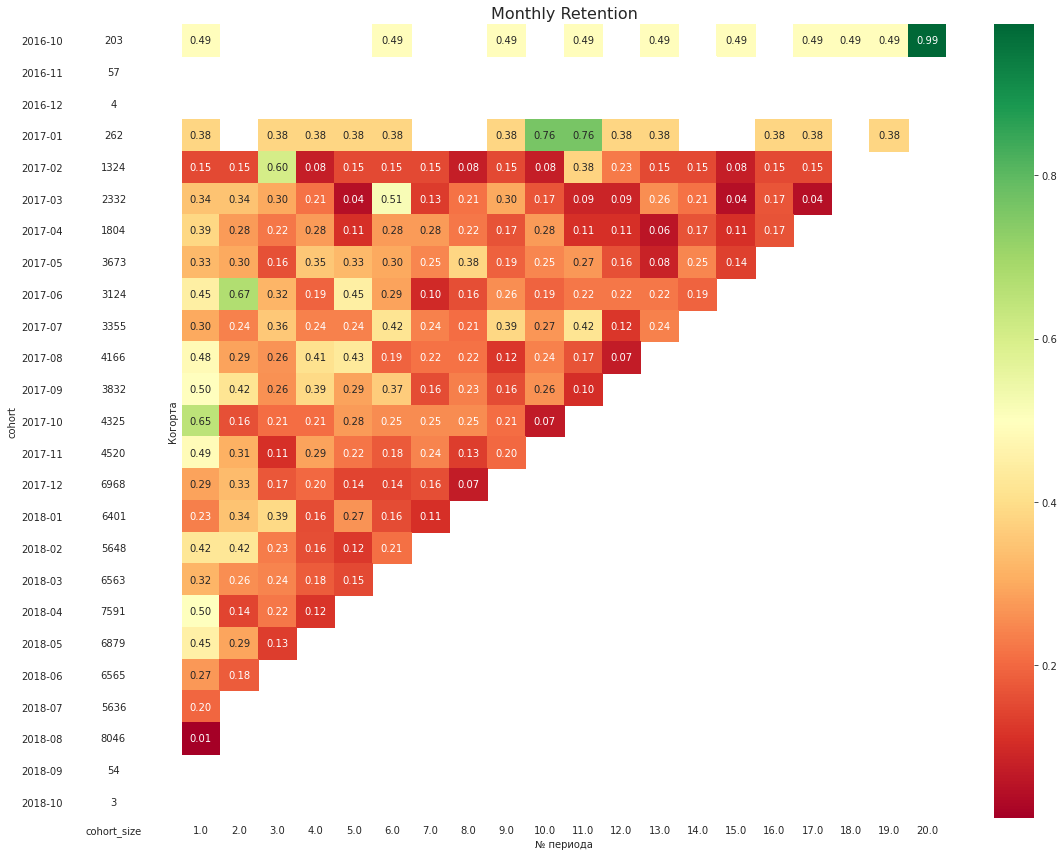

In [36]:
with sns.axes_style("white"):
    fig, ax = plt.subplots(1, 2, figsize=(16, 12), sharey=True, gridspec_kw={'width_ratios': [1, 11]})

    # Тепловая карта для коэффициентов удержания
    sns.heatmap(retention_matrix_fixed,
                mask=retention_matrix_fixed.isnull(),
                annot=True,
                fmt='.2f',
                cmap='RdYlGn',
                ax=ax[1])
    ax[1].set_title('Monthly Retention', fontsize=16)
    ax[1].set(xlabel='№ периода', ylabel='Когорта')

    # Тепловая карта для размеров когорт
    cohort_size_df = pd.DataFrame(cohort_size).rename(columns={0: 'cohort_size'})
    white_cmap = mcolors.ListedColormap(['white'])
    sns.heatmap(cohort_size_df,
                annot=True,
                cbar=False,
                fmt='g',
                cmap=white_cmap,
                ax=ax[0])

    fig.tight_layout()
    plt.show()

<span style="font-size: 18px;">На фоне низких значений retention в целом видны отдельные более яркие всплески(аномалии) в разные месяцы в разных когортах. Не наблюдается очевидной динамики. Самая стабильная когорта с хорошим относительно других когорт retention - '2017-01'.Также хороший retention был у самой первой когорты '2016-10', несмотря на пропуски в данных.</span>

In [ ]:
# медианный retention 1-го месяца, коэффициент

In [37]:
median_retention_1 = retention_matrix[1].median()/100
median_retention_1

0.003816793893129771

<span style="font-size: 18px;">Только 3-4 человека из 1000 'в среднем' совершают повторный заказ в следующем месяце.</span>


<span style="font-size: 18px;">На 3-й месяц самый высокий retention показала когорта '2017-02'.</span>

In [38]:
retention_matrix.loc[retention_matrix[3] == retention_matrix[3].max()]

period_number_month,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0
cohort,,,,,,,,,,,,,,,,,,,,,
2017-02,100.0,0.151057,0.151057,0.60423,0.075529,0.151057,0.151057,0.151057,0.075529,0.151057,...,0.377644,0.226586,0.151057,0.151057,0.075529,0.151057,0.151057,NaN,NaN,NaN


### Анализ product/market fit

<span style="font-size: 18px;">
Задачи:
    
- определить, существует ли product/market fit у маркетплейса;
- сформулировать, на чём маркетплейс должен сконцентрироваться в ближайшее время;
- проиллюстрировать результаты релевантной визуализацией.
</span>

<span style="font-size: 18px;">Основной метрикой для измерения product/market fit является retention. В нашем случае месячный retention составляет менее одного процента при среднем хорошем значении месячного retention для маркетплейсов - 20-30%*, что является критически низким значением. 
Очень вероятно, что при масштабировании возникнут убытки, но без дополнительной информации 
посчитать юнит-экономику, чтобы более точно оценить финансовые результаты, не представляется 
возможным. Необходимо найти причину, почему так мало повторных успешных заказов. Возможно, проблема возникает на одном или нескольких этапах от создания заказа до получения заказа покупателем. 

*https://secrets.tbank.ru/glossarij/retention/?utm_referrer=https%3A%2F%2Fwww.google.com%2F#4
</span>


In [39]:
order_status_df = df.copy()

In [40]:
orders_count = order_status_df.order_id.nunique()
orders_count

99441

In [41]:
order_status_count = order_status_df.groupby('order_status') \
                                    .order_id.nunique()
order_status_count

order_status
approved           2
canceled         625
created            5
delivered      96478
invoiced         314
processing       301
shipped         1107
unavailable      609
Name: order_id, dtype: int64

In [42]:
completed_orders = order_status_count['canceled'] \
                    + order_status_count['unavailable'] \
                    + order_status_count['delivered']
delivered_share = order_status_count['delivered'] / completed_orders
delivered_share

0.9873710496151957

In [43]:
canceled_orders = order_status_count['canceled'] + order_status_count['unavailable']
canceled_orders

1234

In [44]:
unavailable_share = order_status_count['unavailable'] / canceled_orders
unavailable_share

0.49351701782820095

In [45]:
orders_in_progress = order_status_df.order_id.nunique() - completed_orders
orders_in_progress/orders_count

0.017387194416789854

<span style="font-size: 18px;">Среди завершенных заказов 99% были успешно доставлены. Значит, дело не в отмене заказов. 
Среди отменённых заказов половина была отменена по причине недоступности товара. Стоит обратить внимание на логистику.</span>

In [46]:
# отбираю только завершенные заказы
completed_orders_list = ['canceled', 'unavailable', 'delivered']
completed_orders_df = order_status_df[order_status_df['order_status'].isin(completed_orders_list)]
# объединяю отменённые заказы в один статус
completed_orders_df['plot_status'] =  completed_orders_df['order_status'].apply(lambda x: 'delivered' if x == 'delivered' else 'canceled')
# отбираю только уникальные заказы
unique_orders_list = completed_orders_df.order_id.unique().tolist()
completed_orders_df = completed_orders_df[completed_orders_df['order_id'].isin(unique_orders_list)]

/tmp/ipykernel_200/2963384397.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  completed_orders_df['plot_status'] =  completed_orders_df['order_status'].apply(lambda x: 'delivered' if x == 'delivered' else 'canceled')


In [47]:
# делю покупателей на группы в зависимости от даты совершения заказа
completed_orders_df['order_group'] = completed_orders_df.groupby('customer_unique_id')['order_purchase_timestamp'].transform('min').dt.to_period('M')

In [48]:
# отбираю
completed_orders_plot_df = completed_orders_df[['order_id', 'order_group', 'plot_status']]
completed_orders_plot_df.head()

,order_id,order_group,plot_status
0,00e7ee1b050b8499577073aeb2a297a1,2017-05,delivered
1,29150127e6685892b6eab3eec79f59c7,2018-01,delivered
2,b2059ed67ce144a36e2aa97d2c9e9ad2,2018-05,delivered
3,951670f92359f4fe4a63112aa7306eba,2018-03,delivered
4,6b7d50bd145f6fc7f33cebabd7e49d0f,2018-07,delivered


/tmp/ipykernel_200/1910605026.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  completed_orders_plot_df.sort_values('order_group', inplace=True) # упорядочиваю временные промежутки


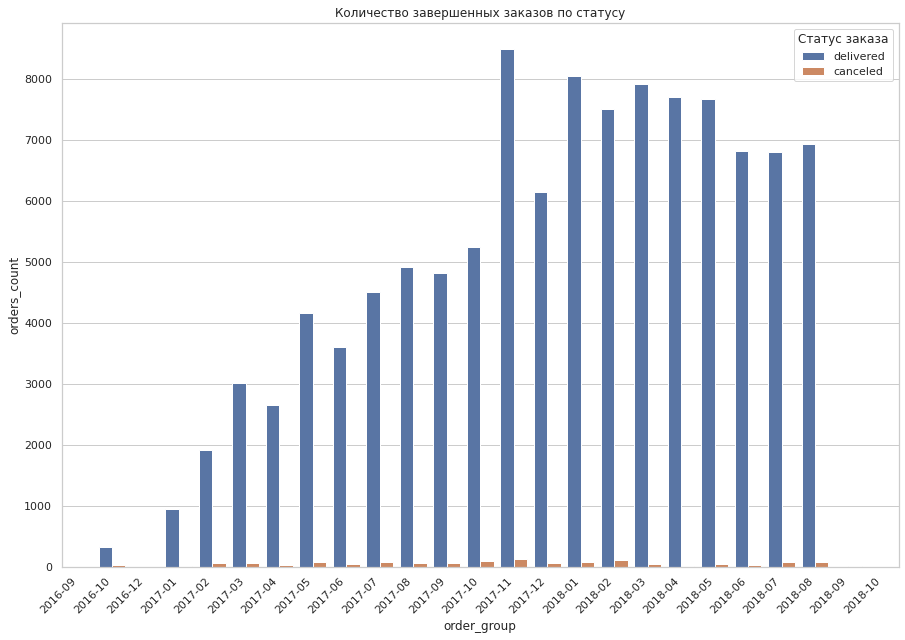

In [49]:
completed_orders_plot_df.sort_values('order_group', inplace=True) # упорядочиваю временные промежутки

plt.figure(figsize=(15,10)) # регулировка размерности графика
sns.set_theme(style="whitegrid") # Устанавливаем стиль для более элегантных графиков
plot = sns.countplot(data = completed_orders_plot_df, x = 'order_group', hue = 'plot_status')
plt.title('Количество завершенных заказов по статусу')
plot.set_xticklabels(plot.get_xticklabels(), rotation=45, ha='right')
plt.legend(title='Статус заказа', loc='upper right')
plt.ylabel('orders_count')
plt.show()

<span style="font-size: 18px;">Кроме того, количество успешных заказов, в целом, постепенно увеличивается.
Причиной того, судя по значениям retention, является приток новых покупателей. Значит, покупатели получают негативный опыт при первом заказе и поэтому не оформляют повторные заказы.</span>

In [ ]:
# pie chart

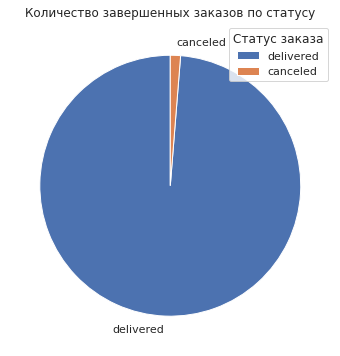

In [50]:
pie_chart_plot_df = completed_orders_plot_df.groupby('plot_status', as_index = False).order_id.nunique().sort_values('order_id', ascending = False)
plt.figure(figsize=(10,6)) # регулировка размерности графика
plt.pie(pie_chart_plot_df.order_id, startangle = 90, rotatelabels = False, labels = pie_chart_plot_df.plot_status)
plt.title('Количество завершенных заказов по статусу')
plt.legend(title='Статус заказа', loc='upper right')

In [51]:
df_copy['delivery_diff'] = df_copy.order_estimated_delivery_date - df_copy.order_delivered_customer_date
df_copy['delivery_time'] = df_copy.order_delivered_customer_date - df_copy.order_approved_at

In [52]:
df_copy[['delivery_time', 'delivery_diff']].describe()

,delivery_time,delivery_diff
count,110173,110173
mean,12 days 00:48:13.534532054,11 days 07:56:19.251068773
std,9 days 09:53:02.984956610,10 days 03:50:28.448127823
min,-7 days +00:14:54,-189 days +00:35:53
25%,6 days 06:42:23,6 days 11:25:31
50%,9 days 19:04:59,12 days 01:05:04
75%,15 days 00:57:25,16 days 07:37:58
max,208 days 12:01:24,146 days 00:23:13


In [53]:
df_copy['delivery_diff_days'] = df_copy['delivery_diff'].dt.days
df_copy['delivery_diff_days'] = np.ceil(df_copy['delivery_diff_days'])

In [54]:
late_orders_share = df_copy.query('delivery_diff_days > 0') \
                            .order_id.nunique()/df_copy \
                            .order_id.nunique()*100
late_orders_share

90.3716759110466

<span style="font-size: 18px;">Среднее время доставки заказов составляет 10 дней.
90% заказов доставлены с задержкой. Это и есть причина негативного опыта покупателей.</span>

In [55]:
diff_df = df_copy[['order_id', 'customer_state', 'customer_city', 'delivery_diff_days']]

In [56]:
diff_state_df = diff_df.groupby('customer_state', as_index = False) \
                        .delivery_diff_days.mean() \
                        .rename(columns = {'customer_state': 'state'})

Text(0.5, 1.0, 'Средний срок задержки доставки заказов по штатам')

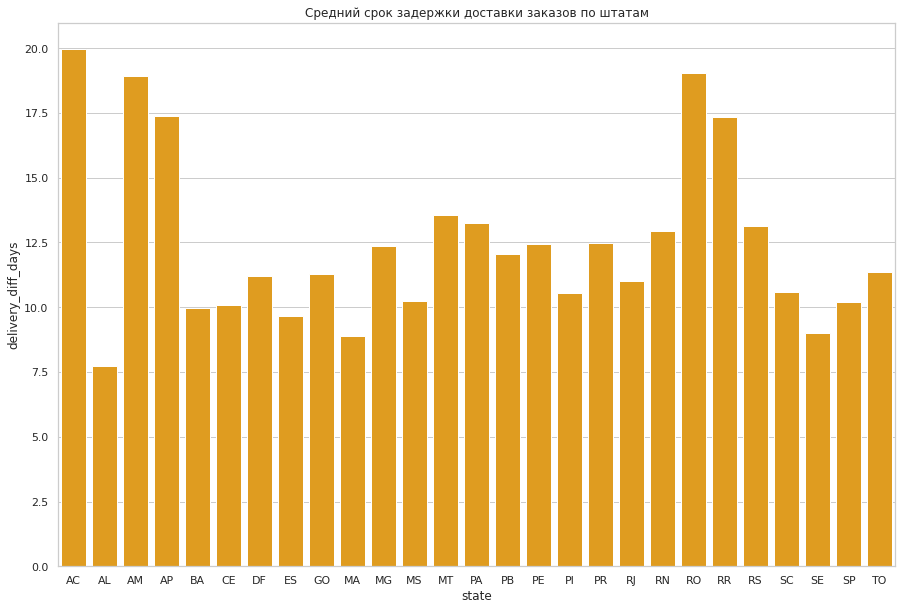

In [114]:
plt.figure(figsize=(15,10)) # регулировка размерности графика
sns.set_theme(style="whitegrid") # Устанавливаем стиль для более элегантных графиков
sns.barplot(data = diff_state_df, x = 'state', y = 'delivery_diff_days', color='orange')
plt.title('Средний срок задержки доставки заказов по штатам')

<span style="font-size: 18px;">В среднем, по всей стране задержки заказов составляют 10 дней. Самые долгие задержки в среднем от 15 до 20 дней наблюдаются в штатах: AC, AM, AP, RO, RR. 
</span>

In [59]:
df_copy['carrier_diff'] = df_copy.order_delivered_carrier_date  - df_copy.shipping_limit_date
df_copy['carrier_time'] = df_copy.order_delivered_carrier_date  - df_copy.order_approved_at

In [60]:
df_copy['carrier_diff_days'] = df_copy['carrier_diff'].dt.days
df_copy['carrier_time_days'] = df_copy['carrier_time'].dt.days
df_copy[['carrier_diff_days', 'carrier_time_days']].describe()

,carrier_diff_days,carrier_time_days
count,110173.000000,110173.000000
mean,-3.822361,2.342062
std,5.832394,3.589923
min,-1047.000000,-172.000000
25%,-6.000000,0.000000
50%,-4.000000,1.000000
75%,-2.000000,3.000000
max,116.000000,125.000000


<span style="font-size: 18px;">В среднем, заказы передают в логистическую службу за один день.
Даже раньше, чем предполагалось. 
</span>

In [61]:
late_carrier_share = df_copy.query('carrier_diff_days > 0').order_id.nunique()/df_copy.order_id.nunique()*100
late_carrier_share

4.517132341506402

<span style="font-size: 18px;">
Только 4,5% заказов были позднее переданы партнёру по логистике. 
Таким образом, регулярные задержки доставок не связаны с длительностью передачи заказов в логистическую службу. 
Рекомендуется проработать логистику в части сроков доставки, а именно:

- совместно с партнёром улучшить систему предварительной оценки сроков доставки;
- сменить логистическую службу на более надёжную.
  
</span>

In [62]:
completed_orders_df['payment_time'] = completed_orders_df.order_approved_at  - completed_orders_df.order_purchase_timestamp
completed_orders_df['payment_time_minutes'] = completed_orders_df['payment_time'].dt.total_seconds() // 3600
payment_time_df = completed_orders_df.groupby('order_group') \
                                     .payment_time_minutes.mean()

In [63]:
completed_orders_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,plot_status,order_group,payment_time,payment_time_minutes
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,1.0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,delivered,2017-05,0 days 00:16:37,0.0
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,1.0,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48,delivered,2018-01,0 days 00:10:08,0.0
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,1.0,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,delivered,2018-05,1 days 00:11:25,24.0
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,1.0,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36,delivered,2018-03,0 days 01:22:41,1.0
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,1.0,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25,delivered,2018-07,0 days 00:18:39,0.0


Text(0, 0.5, 'hours')

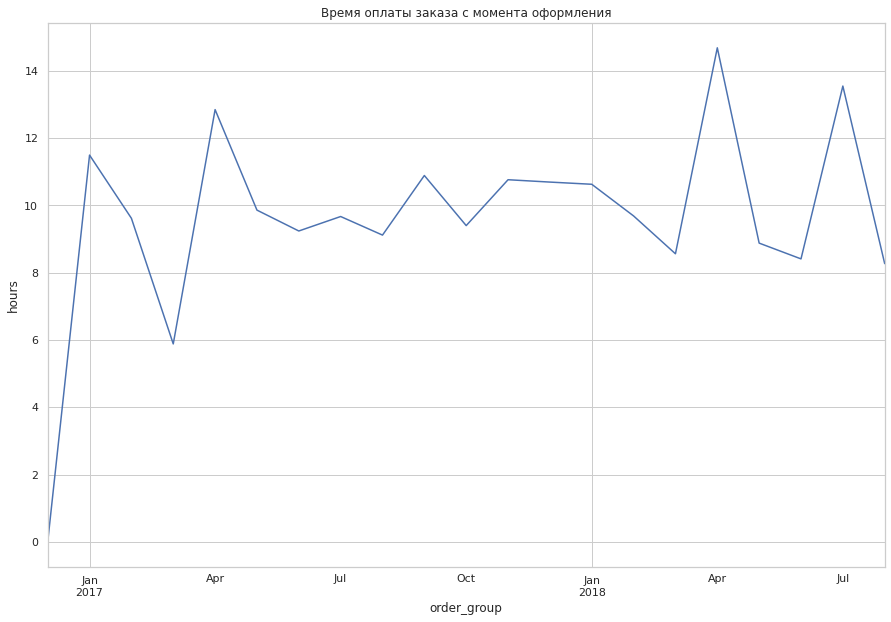

In [64]:
plt.figure(figsize=(15,10)) # регулировка размерности графика
sns.set_theme(style="whitegrid") # Устанавливаем стиль для более элегантных графиков

payment_time_df[2:23].plot()

plt.title('Время оплаты заказа с момента оформления')
plot.set_xticklabels(plot.get_xticklabels(), rotation=45, ha='right')
plt.ylabel('hours')


In [65]:
completed_orders_df['payment_time'].describe()

count                       111357
mean     0 days 10:36:47.610145747
std      1 days 01:21:02.467890662
min                0 days 00:00:00
25%                0 days 00:12:59
50%                0 days 00:21:01
75%                0 days 15:11:41
max              187 days 21:10:50
Name: payment_time, dtype: object

<span style="font-size: 18px;">Время оплаты заказа с момента офрмления достигало более 14 часов при среднем значении 10 часов. 
Вероятно у покупателей возникали проблемы с оплатой заказов. 
</span>

### Продуктовые метрики

<span style="font-size: 18px;">
Задачи:
    
- определить 5 основных метрик, на которых продакт может сконцентрироваться, чтобы максимизировать прибыль компании:
  * первая метрика должна отражать рост объёма продаж маркетплейса;
  * вторая — показывать объем аудитории, которой продукт доставляет ценность;
  * третья — отражать заинтересованность новых клиентов в продукте (даже если вы не можете посчитать ее на имеющихся у вас данных);
  * четвёртая — отражать вовлеченность клиента в продолжение использования продукта;
  * пятая — отражать денежное выражение вовлеченности клиента;
- визуализировать первую, вторую, четвёртую и пятую метрики.
</span>

<span style="font-size: 18px;">
Ниже приведены 5 основных метрик, на которых продакт может сконцентрироваться, чтобы 
максимизировать прибыль компании:
    
1 - Количество успешных заказов.

2 - Количество клиентов, оформивших успешный заказ.

3 - Конверсия в первую покупку.

4 - Retention.

5 - Средний чек клиента.
</span>

In [ ]:
# использую месячную гранулярность и окно в 1 месяц

In [66]:
lineplot = df_copy.groupby('cohort', as_index = False) \
                  .order_id.nunique() \
                  .rename(columns = {'order_id' : 'delivered_orders'}) 

Text(0, 0.5, 'delivered_orders_count')

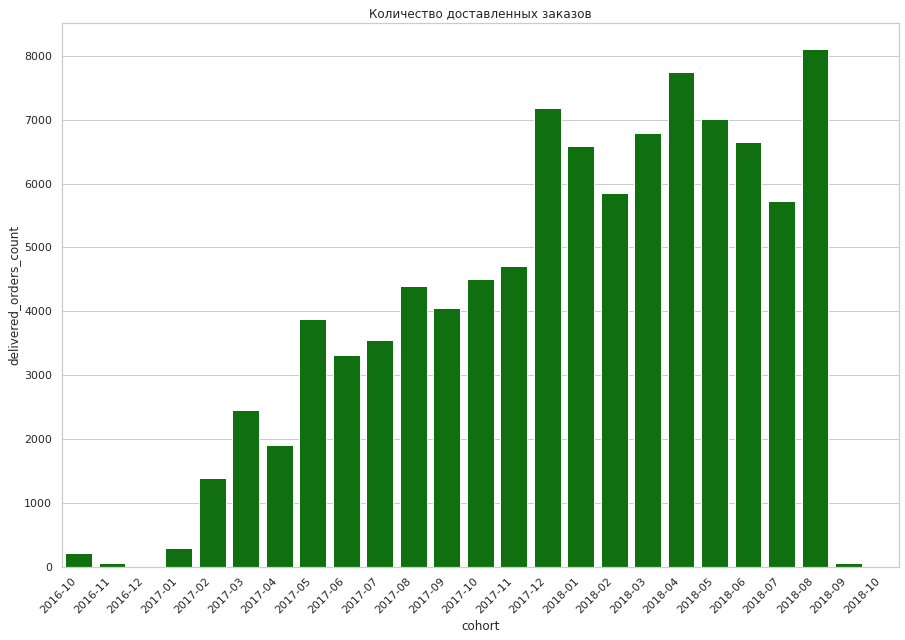

In [75]:
plt.figure(figsize=(15,10)) # регулировка размерности графика
sns.set_theme(style="whitegrid") # Устанавливаем стиль для более элегантных графиков

plot = sns.barplot(data = lineplot, x = 'cohort', y = 'delivered_orders', color='green')
plt.title('Количество доставленных заказов')
plot.set_xticklabels(plot.get_xticklabels(), rotation=45, ha='right')
plt.ylabel('delivered_orders_count')

In [76]:
success_customers_plot = df_copy.groupby('cohort', as_index = False) \
                                .customer_unique_id.nunique() \
                                .rename(columns = {'customer_unique_id': 'unique_customers_count'})
success_customers_plot.head()

,cohort,unique_customers_count
0,2016-10,203
1,2016-11,57
2,2016-12,4
3,2017-01,262
4,2017-02,1324


Text(0, 0.5, 'unique_customers_count')

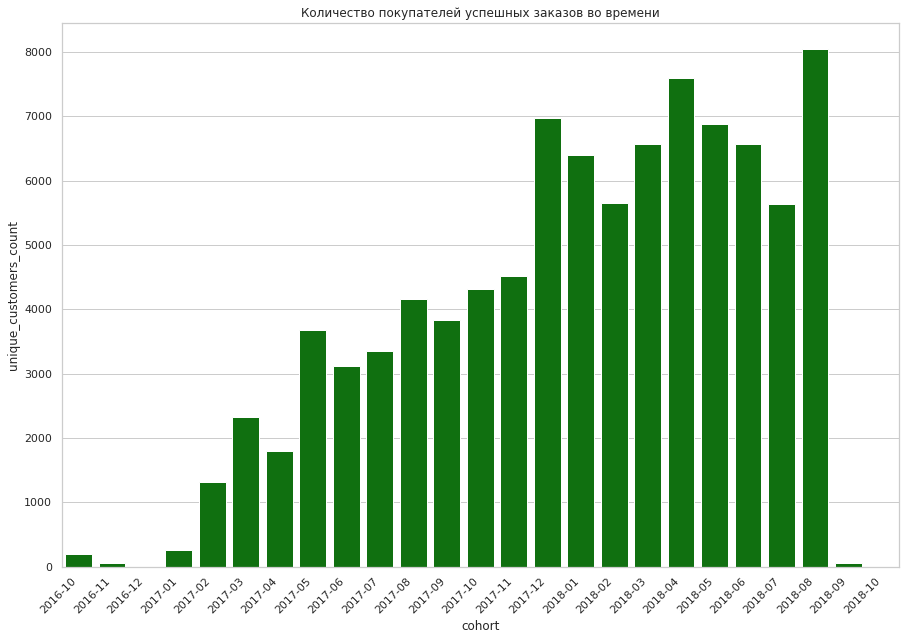

In [77]:
plt.figure(figsize=(15,10)) # регулировка размерности графика
sns.set_theme(style="whitegrid") # Устанавливаем стиль для более элегантных графиков

plot = sns.barplot(data = success_customers_plot, x = 'cohort', y = 'unique_customers_count', color='green')
plt.title('Количество покупателей успешных заказов во времени')
plot.set_xticklabels(plot.get_xticklabels(), rotation=45, ha='right')
plt.xlabel('cohort')
plt.ylabel('unique_customers_count')

In [78]:
df_last_group =df.copy()
df_last_group['group'] = df_last_group.groupby('customer_unique_id')['order_purchase_timestamp'] \
                                      .transform('min').dt.to_period('M')
df_last_group.query("order_status == ['created', 'approved', 'invoiced', 'processing', 'shipped']") \
             .groupby('group', as_index = False) \
             .customer_unique_id.nunique()

,group,customer_unique_id
0,2016-09,1
1,2016-10,28
2,2017-01,36
3,2017-02,65
4,2017-03,71
5,2017-04,74
6,2017-05,95
7,2017-06,71
8,2017-07,75
9,2017-08,79


<span style="font-size: 18px;">
Нет большого количества заказов в обработке в когортах 2018-09, 2018-10, где просело количество 
покупателей. Возможно, произошел сбой в системе, из-за которого данные отражаются некорректно.
Также среди заказов в обработке есть давние заказы. Возможно, существуют проблемы в учёте.
</span>


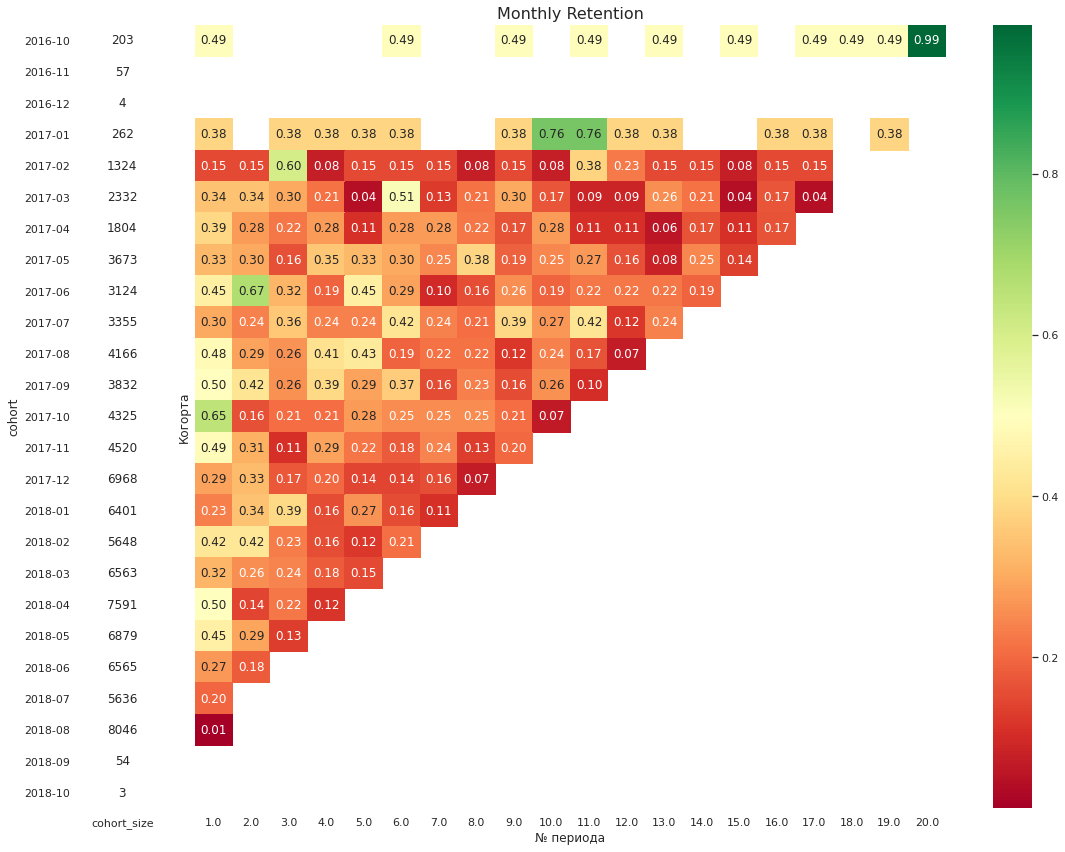

In [81]:
with sns.axes_style("white"):
    fig, ax = plt.subplots(1, 2, figsize=(16, 12), sharey=True, gridspec_kw={'width_ratios': [1, 11]})

    # Тепловая карта для коэффициентов удержания
    sns.heatmap(retention_matrix_fixed,
                mask=retention_matrix_fixed.isnull(),
                annot=True,
                fmt='.2f',
                cmap='RdYlGn',
                ax=ax[1])
    ax[1].set_title('Monthly Retention', fontsize=16)
    ax[1].set(xlabel='№ периода', ylabel='Когорта')

    # Тепловая карта для размеров когорт
    cohort_size_df = pd.DataFrame(cohort_size).rename(columns={0: 'cohort_size'})
    white_cmap = mcolors.ListedColormap(['white'])
    sns.heatmap(cohort_size_df,
                annot=True,
                cbar=False,
                fmt='g',
                cmap=white_cmap,
                ax=ax[0])

    fig.tight_layout()
    plt.show()

In [ ]:
# проверяю, одинаковый ли вес у заказов с одним product_id

In [83]:
freight_value_df = df_copy.groupby(['product_id', 'order_id'], as_index = False) \
                          .freight_value.sum()

freight_value_df_count = freight_value_df.groupby('product_id', as_index = False) \
                                         .freight_value.count() \
                                         .query('freight_value> 1')
freight_value_df_count.head()

,product_id,freight_value
3,000b8f95fcb9e0096488278317764d19,2
6,00126f27c813603687e6ce486d909d01,2
7,001795ec6f1b187d37335e1c4704762e,7
9,001b72dfd63e9833e8c02742adf472e3,11
11,00210e41887c2a8ef9f791ebc780cc36,5


In [84]:
df_copy.query('product_id == "001795ec6f1b187d37335e1c4704762e"')

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,cohort,cohort_day,period_number_month,delivery_diff,delivery_time,delivery_diff_days,carrier_diff,carrier_time,carrier_diff_days,carrier_time_days
22672,e5bcb726405d10a80aaa80e36b66e50d,e890c412a8b910d4709660658d700483,75830,mineiros,GO,c432657bb18ddf7f48b7227db09048d4,delivered,2017-12-12 00:29:08,2017-12-12 01:31:21,2017-12-12 21:21:52,...,2017-12,2017-12-22,0.0,19 days 06:31:56,10 days 15:56:43,19.0,-6 days +20:42:27,0 days 19:50:31,-6,0
22673,e5bcb726405d10a80aaa80e36b66e50d,e890c412a8b910d4709660658d700483,75830,mineiros,GO,c432657bb18ddf7f48b7227db09048d4,delivered,2017-12-12 00:29:08,2017-12-12 01:31:21,2017-12-12 21:21:52,...,2017-12,2017-12-22,0.0,19 days 06:31:56,10 days 15:56:43,19.0,-6 days +20:42:27,0 days 19:50:31,-6,0
53424,1143ed87c28997c59c4278b7be8c1e36,ac7cbcc0c3a162e01f6e6d76b2bd6039,5159,sao paulo,SP,dd436680fbd2d38edb26277f5b8379dc,delivered,2017-12-25 15:00:28,2017-12-25 15:30:50,2017-12-28 15:47:24,...,2017-12,2017-12-29,0.0,16 days 07:02:52,4 days 01:26:18,16.0,-1 days +00:16:34,3 days 00:16:34,-1,3
53425,1143ed87c28997c59c4278b7be8c1e36,ac7cbcc0c3a162e01f6e6d76b2bd6039,5159,sao paulo,SP,dd436680fbd2d38edb26277f5b8379dc,delivered,2017-12-25 15:00:28,2017-12-25 15:30:50,2017-12-28 15:47:24,...,2017-12,2017-12-29,0.0,16 days 07:02:52,4 days 01:26:18,16.0,-1 days +00:16:34,3 days 00:16:34,-1,3
53484,9c0e3045a57e330c4f5665cbdf7dae61,bd3d1b2b49d28a288759bd3433ce950a,3703,sao paulo,SP,19e2f4888f56504ec0f7e0765c9e36dc,delivered,2017-10-28 18:16:38,2017-10-28 18:30:22,2017-10-31 14:00:04,...,2017-11,2017-11-01,0.0,8 days 08:20:09,3 days 21:09:29,8.0,-4 days +19:29:42,2 days 19:29:42,-4,2
59883,69a802e5bb4b4ae5ccded0cda1d0e40b,b1b8547d1b252e5f9e863bad9ff9e978,29113,vila velha,ES,7a411701d358d7be1e457ec66ceb4731,delivered,2017-11-30 19:27:38,2017-12-01 09:30:48,2017-12-04 16:12:06,...,2017-12,2017-12-30,0.0,-5 days +23:49:30,28 days 14:39:42,-5.0,-3 days +20:37:36,3 days 06:41:18,-3,3
65149,9ee410cee2322bd96ad9ed1949a48333,5a7b42836d728d8ef64dc853bc3eb9eb,5508,sao paulo,SP,8833f31fc345a814293e41677c701c27,delivered,2017-11-25 21:39:13,2017-11-25 22:33:17,2017-11-28 20:41:34,...,2017-11,2017-11-30,0.0,10 days 01:41:14,4 days 23:45:29,10.0,-2 days +22:09:56,2 days 22:08:17,-2,2
106768,1ac4870458ef0396d390ffbf31cabd7a,d5cff640378cfb03c9f1c0ef5e371cb6,11630,ilhabela,SP,ffda7f88e6a571a9e73a0c9c778e606d,delivered,2017-12-16 00:35:54,2017-12-18 01:31:47,2017-12-18 22:04:40,...,2017-12,2017-12-28,0.0,13 days 05:03:13,10 days 17:25:00,13.0,-4 days +20:33:02,0 days 20:32:53,-4,0
108112,04d70d1856e89f6f07b217728eca4daa,6b80df9379b85ebefdf9253f2e6bb188,9720,sao bernardo do campo,SP,c78ef951d29d8e1af5f1f807a64af309,delivered,2017-12-27 00:22:18,2017-12-27 00:34:19,2018-01-03 20:23:32,...,2018-01,2018-01-05,0.0,10 days 06:45:36,9 days 16:40:05,10.0,0 days 19:49:13,7 days 19:49:13,0,7


In [85]:
df_copy.freight_value.describe()

count    110173.000000
mean         19.949051
std          15.699528
min           0.000000
25%          13.080000
50%          16.260000
75%          21.150000
max         409.680000
Name: freight_value, dtype: float64

In [86]:
df_copy.query('freight_value == 0').order_id.count()

381

<span style="font-size: 18px;">
Вес заказов с одним product_id сильно различается при одинаковой цене за единицу товара. Допускаю, что единица товара у таких product_id измеряется весовыми категориями. Тогда стоимость заказа будет равна freight_value * price. Однако у 381 заказа вес нулевой, стоимость считаю поштучно. Это значит, что маркетплейс продаёт и весовые, и штучные товары.
</span>

In [87]:
df_copy['revenue_freight'] = df_copy.query('freight_value > 0').freight_value * df_copy.query('freight_value > 0').price
df_copy['revenue_item'] = df_copy.query('freight_value == 0').price
df_copy['revenue_freight'] = df_copy['revenue_freight'].fillna(0)
df_copy['revenue_item'] = df_copy['revenue_item'].fillna(0)
df_copy[['customer_unique_id', 'order_id', 'order_status', 'price', 'freight_value', 'revenue_freight', 'revenue_item']].head()

,customer_unique_id,order_id,order_status,price,freight_value,revenue_freight,revenue_item
0,861eff4711a542e4b93843c6dd7febb0,00e7ee1b050b8499577073aeb2a297a1,delivered,124.99,21.88,2734.7812,0.0
1,290c77bc529b7ac935b93aa66c333dc3,29150127e6685892b6eab3eec79f59c7,delivered,289.00,46.48,13432.7200,0.0
2,060e732b5b29e8181a18229c7b0b2b5e,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,139.94,17.79,2489.5326,0.0
3,259dac757896d24d7702b9acbbff3f3c,951670f92359f4fe4a63112aa7306eba,delivered,149.94,23.36,3502.5984,0.0
4,345ecd01c38d18a9036ed96c73b8d066,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,230.00,22.25,5117.5000,0.0


In [88]:
df_copy['revenue'] = df_copy['revenue_freight'] + df_copy['revenue_item']

In [89]:
revenue_df = df_copy.groupby(['customer_unique_id', 'cohort', 'order_id'], as_index = False) \
                    .revenue.sum()
revenue_df.head()

,customer_unique_id,cohort,order_id,revenue
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05,e22acc9c116caa3f2b7121bbb380d08e,1558.8000
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05,3594e05a005ac4d06a72673270ef9ec9,156.6810
2,0000f46a3911fa3c0805444483337064,2017-04,b33ec3b699337181488304f362a6b734,1188.1800
3,0000f6ccb0745a6a4b88665a16c9f078,2017-11,41272756ecddd9a9ed0180413cc22fb6,458.2037
4,0004aac84e0df4da2b147fca70cf8255,2017-11,d957021f1127559cd947b62533f484f7,3040.2000


In [90]:
customer_total_revenue = revenue_df.groupby(['customer_unique_id', 'cohort'], as_index = False) \
                                   .revenue.sum()

customer_total_orders = revenue_df.groupby(['customer_unique_id', 'cohort'], as_index = False) \
                                  .order_id.count() \
                                  .rename(columns = {'order_id': 'order_count'})

revenue_per_customer = pd.merge(customer_total_revenue,customer_total_orders, how = 'inner', on = ['customer_unique_id', 'cohort'])
revenue_per_customer['avg_bill'] = round(revenue_per_customer.revenue / revenue_per_customer.order_count)
revenue_per_customer.head()

,customer_unique_id,cohort,revenue,order_count,avg_bill
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05,1558.8000,1,1559.0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05,156.6810,1,157.0
2,0000f46a3911fa3c0805444483337064,2017-04,1188.1800,1,1188.0
3,0000f6ccb0745a6a4b88665a16c9f078,2017-11,458.2037,1,458.0
4,0004aac84e0df4da2b147fca70cf8255,2017-11,3040.2000,1,3040.0


In [91]:
revenue_per_customer.customer_unique_id.nunique()

93336

In [92]:
pd.options.display.float_format = '{:.2f}'.format
revenue_per_customer.describe()

,revenue,order_count,avg_bill
count,93336.00,93336.00,93336.00
mean,4220.01,1.03,4115.94
std,17815.24,0.21,17569.76
min,15.50,1.00,15.00
25%,649.84,1.00,640.00
50%,1429.69,1.00,1390.00
75%,3183.17,1.00,3080.25
max,1479562.34,15.00,1479562.00


In [93]:
revenue_per_customer_plot = revenue_per_customer.groupby('cohort', as_index = False) \
                                                .avg_bill.mean()
revenue_per_customer_plot.head()

,cohort,avg_bill
0,2016-10,3811.27
1,2016-11,4968.04
2,2016-12,15893.75
3,2017-01,2628.17
4,2017-02,3896.06


Text(0, 0.5, 'avg_bill')

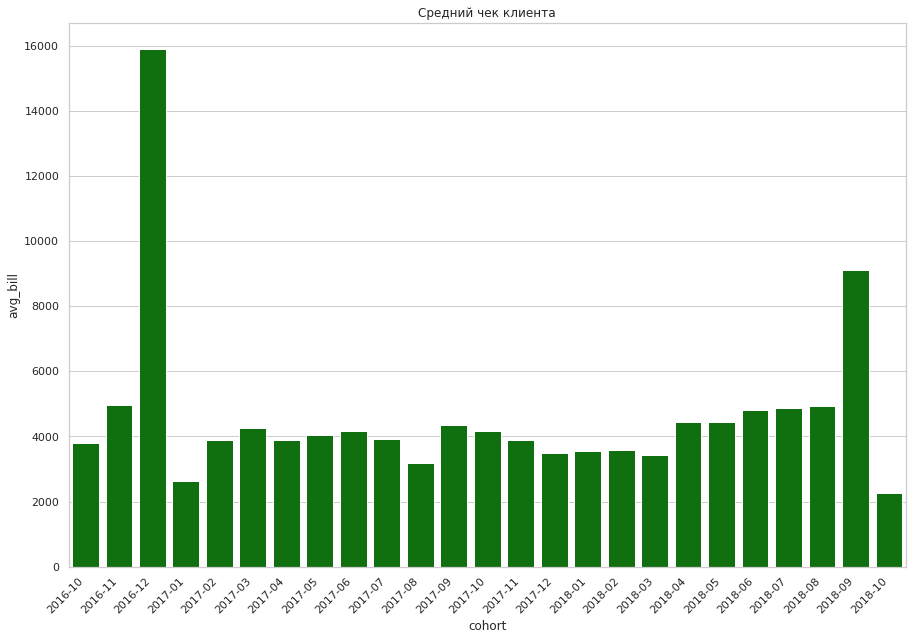

In [118]:
plt.figure(figsize=(15,10)) # регулировка размерности графика
sns.set_theme(style="whitegrid") # Устанавливаем стиль для более элегантных графиков

plot = sns.barplot(data = revenue_per_customer_plot, x = 'cohort', y = 'avg_bill', color='green')
plt.title('Средний чек клиента')
plot.set_xticklabels(plot.get_xticklabels(), rotation=45, ha='right')
plt.xlabel('cohort')
plt.ylabel('avg_bill')

In [96]:
revenue_per_customer.order_count.value_counts()

1     90536
2      2572
3       181
4        28
5         9
6         5
7         3
9         1
15        1
Name: order_count, dtype: int64

In [97]:
revenue_per_customer.order_count.value_counts()[1]/revenue_per_customer.order_count.sum()

0.9386345964439375

In [98]:
df_copy.product_id.nunique()

32210

### Приоритизация гипотез методом ICE

<span style="font-size: 18px;">
Задачи:
    
- посчитать impact;
- выбрать одну из 3 основных гипотез с помощью фреймворка ICE, которые были сформированы продактом.

Для расчёта Impact возьмите данные с июня 2017 года. Считайте, что конверсия в повторный заказ равна величине медианного retention 1-го месяца. Для перевода метрики в Impact воспользуйтесь следующей шкалой:
</span>

In [99]:
scale = {
    'Impact': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Значение метрики': [
        '0 - 50',
        '51 - 150',
        '151 - 350',
        '351 - 750',
        '751 - 1550',
        '1551 - 3150',
        '3151 - 6350',
        '6351 - 12750',
        '12751 - 25550',
        '25551 - 51150'
    ]
}
scale_df = pd.DataFrame(scale)
print(scale_df)

   Impact Значение метрики
0       1           0 - 50
1       2         51 - 150
2       3        151 - 350
3       4        351 - 750
4       5       751 - 1550
5       6      1551 - 3150
6       7      3151 - 6350
7       8     6351 - 12750
8       9    12751 - 25550
9      10    25551 - 51150


In [100]:
median_retention_1

0.003816793893129771

In [101]:
total_orders = completed_orders_df.query('order_purchase_timestamp >= "2017-06-01"') \
                                  .order_id.nunique()

successful_orders = df_copy.query('order_purchase_timestamp >= "2017-06-01"') \
                           .order_id.nunique()

canceled_orders = total_orders - successful_orders
print(total_orders)
print(successful_orders)
print(canceled_orders)

86387
85405
982


<span style="font-size: 18px;">Расчеты Impact для гипотез
</span>

<span style="font-size: 18px;">
Гипотеза 1
    
Если исправим баг в системе процессинга заказов, то клиентам не придётся сталкиваться с проблемой отмены заказа, вследствие чего количество доставленных заказов увеличится. Считаем, что мы таким образом избавимся от всех отмен.
</span>

In [109]:
# canceled_orders_share = canceled_orders / total_orders

In [103]:
total_customers = completed_orders_df.query('order_purchase_timestamp >= "2017-06-01"') \
                                     .customer_unique_id.nunique()

paying_customers = df_copy.query('order_purchase_timestamp >= "2017-06-01"') \
                          .customer_unique_id.nunique()

canceled_customers = total_customers - paying_customers
print(total_customers)
print(paying_customers)
print(canceled_customers)

83733
82855
878


In [104]:
impact_1 = canceled_orders # Гипотеза 1
print(f"Impact гипотезы 1: {impact_1:.0f} новых заказов. По шкале Impact это соответствует значению 5.")

Impact гипотезы 1: 982 новых заказов. По шкале Impact это соответствует значению 5.


<span style="font-size: 18px;">
Гипотеза 2
    
Если сократим время до отгрузки заказа, то клиенты перестанут получать свой заказ с запаздыванием, вследствие чего количество заказов увеличится за счёт повторных заказов. 
</span>

In [105]:
late_carrier_orders_count = df_copy.query('carrier_diff_days > 0').order_id.nunique()
late_carrier_orders_count

4357

In [107]:
impact_2 = late_carrier_orders_count * median_retention_1  # Гипотеза 2
print(f"Impact гипотезы 2: {impact_2:.0f} повторных заказов. По шкале Impact это соответствует значению 1.")

Impact гипотезы 2: 17 повторных заказов. По шкале Impact это соответствует значению 1.


<span style="font-size: 18px;">
Гипотеза 3
    
Если создадим новый способ оплаты, который будет конвертировать клиентов в повторный заказ, то клиенты не будут испытывать трудности при оформлении заказа, вследствие чего количество заказов увеличится за счёт повторных заказов тех, кто раньше не делал повторный заказ.
</span>


In [108]:
single_order_customers = df_copy.groupby('customer_unique_id', as_index = False) \
                                .order_id.nunique() \
                                .query('order_id == 1') \
                                .customer_unique_id.count()
single_order_customers

90536

In [109]:
impact_3 = single_order_customers * median_retention_1  # Гипотеза 3
print(f"Impact гипотезы 3: {impact_3:.0f} новых платящих пользователей. По шкале Impact это соответствует значению 3.")

Impact гипотезы 3: 346 новых платящих пользователей. По шкале Impact это соответствует значению 3.


<span style="font-size: 18px;">
Оценки Impact, Confidence и Ease
</span>

In [111]:
impact = [impact_1, impact_2, impact_3]

confidence = [8, 10, 5]

ease = [6, 4, 9]

# ICE для каждой гипотезы

ice_scores = [

    impact[0] * confidence[0] * ease[0],

    impact[1] * confidence[1] * ease[1],

    impact[2] * confidence[2] * ease[2]

]

# Вывод результатов

for i, ice in enumerate(ice_scores, start=1):

    print(f"ICE гипотезы {i}: {ice:.2f}")

ICE гипотезы 1: 47136.00
ICE гипотезы 2: 665.19
ICE гипотезы 3: 15550.08


<span style="font-size: 18px;">
Методом ICE к реализации выбрана гипотеза 1.
</span>


### Формулировка метрик

<span style="font-size: 18px;">
Задачи:
    
- сформулировать метрики, на которые должна повлиять выбранная гипотеза.
</span>

<span style="font-size: 18px;">
После выбора гипотезы можно начать подготовку к проведению A/B-тестирования.Необходимо конкретизировать положительные изменения от реализации гипотезы метриками, чтобы иметь возможность их оценить.

Реализация гипотезы 1 повлияет на метрики:
* целевые:
  
    - конверсия в успешный заказ;
  
Достоверность - легко посчитать по имеющимся данным
Интерпретируемость - чем выше конверсия в успешный заказ, тем меньше отмененных заказов
Чувствительность - при отсутствии бага клиенты смогут получить свой заказ, соответственно метрика увеличится; 
конверсионные метрики хорошо реагируют на изменения и подходят для экспериментов.

* прокси:
  
    - среднее количество заказов на одного клиента.
  
Достоверность - легко посчитать по имеющимся данным
Интерпретируемость - увеличение количества заказов показывает положительную динамику от изменений
Чувствительность - среднее хорошо отражает изменения

</span>


## Отчёт

<span style="font-size: 18px;">
Задачи:
    
- сформулировать выводы о проделанной работе и подготовить небольшой, но логичный и содержательный отчет.

Рекомендации к структуре отчёта:

- формализация проблемы продукта: что не так и как вы это поняли;
- общие выводы по итогу исследования;
- рекомендации по продукту.
</span>

<span style="font-size: 18px;">
Данные о работе маркетплейса в Бразилии были проанализированы с целью выявления причин стагнации метрик доходности.
В первую очередь был проведён когортный анализ и оценка product/market fit (PMF).

#### Анализ PMF
Основной метрикой для измерения product/market fit является retention. 
В нашем случае месячный retention составляет менее одного процента, что является критически низким значением 
при среднем хорошем значении месячного retention для маркетплейсов - 20-30%*.
Оказалось, что большая часть клиентов совершает первый заказ и больше не возвращается.
Только 3-4 человека из 1000 'в среднем' совершают повторный заказ в следующем месяце
На фоне низких значений retention, в целом, видны отдельные более яркие всплески 
(аномалии) в разные месяцы в разных когортах. Не наблюдается очевидной динамики. 
На графике представлены все когорты, кроме нулевого периода, чтобы  визуализация была более наглядной.

*https://secrets.tbank.ru/glossarij/retention/?utm_referrer=https%3A%2F%2Fwww.google.com%2F#4
</span>

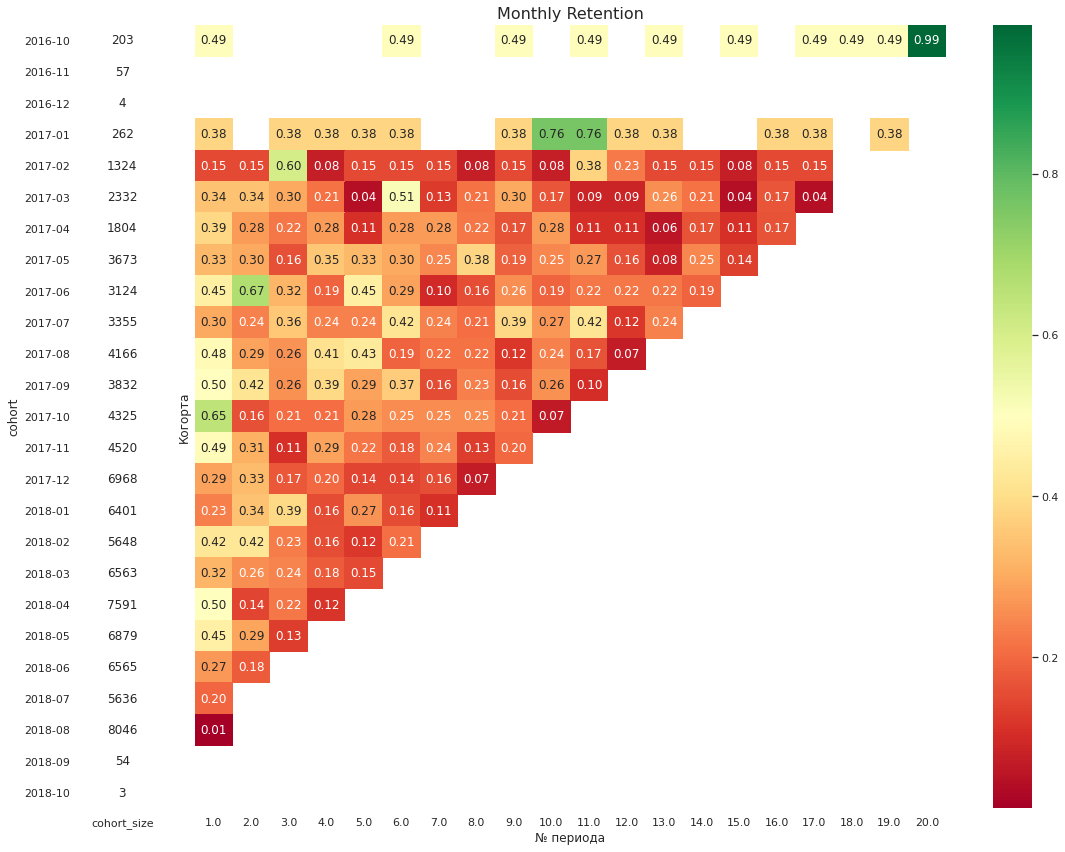

In [112]:
with sns.axes_style("white"):
    fig, ax = plt.subplots(1, 2, figsize=(16, 12), sharey=True, gridspec_kw={'width_ratios': [1, 11]})

    # Тепловая карта для коэффициентов удержания
    sns.heatmap(retention_matrix_fixed,
                mask=retention_matrix_fixed.isnull(),
                annot=True,
                fmt='.2f',
                cmap='RdYlGn',
                ax=ax[1])
    ax[1].set_title('Monthly Retention', fontsize=16)
    ax[1].set(xlabel='№ периода', ylabel='Когорта')

    # Тепловая карта для размеров когорт
    cohort_size_df = pd.DataFrame(cohort_size).rename(columns={0: 'cohort_size'})
    white_cmap = mcolors.ListedColormap(['white'])
    sns.heatmap(cohort_size_df,
                annot=True,
                cbar=False,
                fmt='g',
                cmap=white_cmap,
                ax=ax[0])

    fig.tight_layout()
    plt.show()

<span style="font-size: 18px;">
Среди завершенных заказов 99% были успешно доставлены. Значит, причина низкого retention не в отмене заказов. 
Всего было отменено 1234 заказа. Среди них половина была отменена по причине недоступности товара. 
</span>

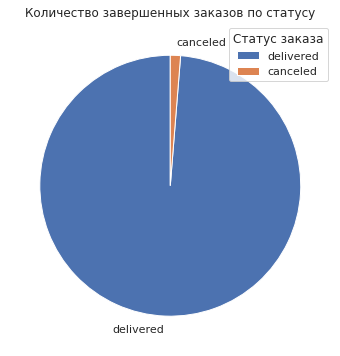

In [113]:
pie_chart_plot_df = completed_orders_plot_df.groupby('plot_status', as_index = False).order_id.nunique().sort_values('order_id', ascending = False)
plt.figure(figsize=(10,6)) # регулировка размерности графика
plt.pie(pie_chart_plot_df.order_id, startangle = 90, rotatelabels = False, labels = pie_chart_plot_df.plot_status)
plt.title('Количество завершенных заказов по статусу')
plt.legend(title='Статус заказа', loc='upper right')

<span style="font-size: 18px;">
Вероятно, покупатели получают негативный опыт при первом заказе и поэтому не оформляют повторные заказы.

Оценка пользовательского опыта.
Среднее время доставки заказов составляет 10 дней.
90% заказов доставлены с задержкой. В среднем, по всей стране задержки заказов составляют 10 дней. 
Самые долгие задержки, в среднем, от 15 до 20 дней наблюдаются в штатах: AC, AM, AP, RO, RR. 
Только 4,5% заказов были позднее переданы партнёру по логистике. 
Таким образом, регулярные задержки доставок не связаны с длительностью передачи заказов в логистическую службу.
</span>

Text(0.5, 1.0, 'Средний срок задержки доставки заказов по штатам')

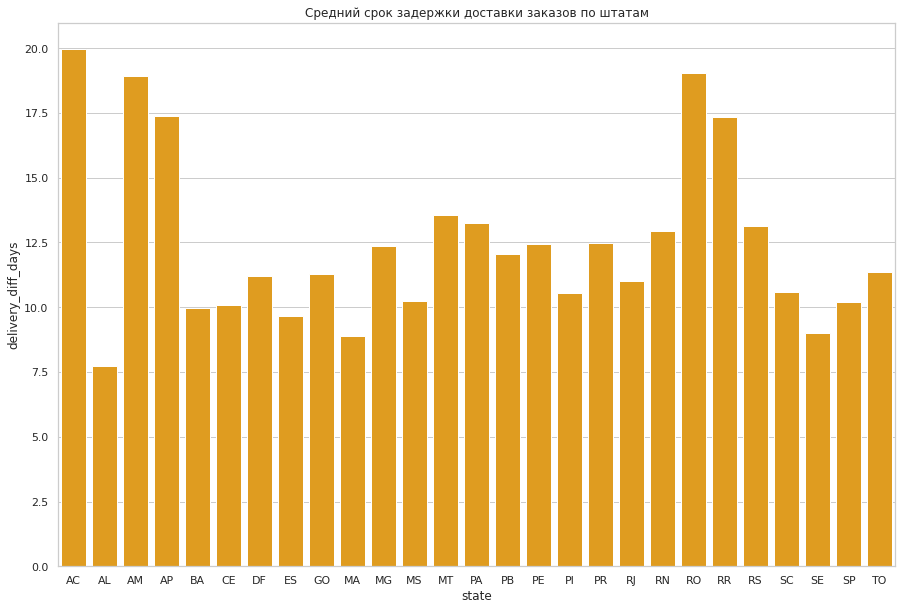

In [115]:
plt.figure(figsize=(15,10)) # регулировка размерности графика
sns.set_theme(style="whitegrid") # Устанавливаем стиль для более элегантных графиков
sns.barplot(data = diff_state_df, x = 'state', y = 'delivery_diff_days', color='orange')
plt.title('Средний срок задержки доставки заказов по штатам')

<span style="font-size: 18px;">
Время оплаты заказа с момента офрмления достигало более 14 часов при среднем значении - 10 часов. 
Вероятно, у покупателей возникали проблемы с оплатой заказов.
</span>

Text(0, 0.5, 'hours')

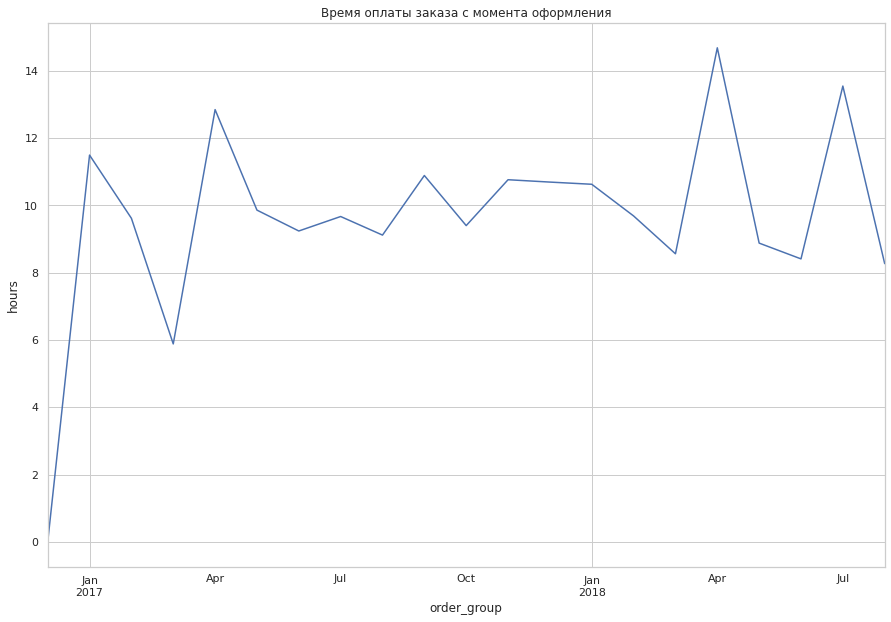

In [116]:
plt.figure(figsize=(15,10)) # регулировка размерности графика
sns.set_theme(style="whitegrid") # Устанавливаем стиль для более элегантных графиков

payment_time_df[2:23].plot()

plt.title('Время оплаты заказа с момента оформления')
plot.set_xticklabels(plot.get_xticklabels(), rotation=45, ha='right')
plt.ylabel('hours')


<span style="font-size: 18px;">
Чтобы улучшить ситуацию и максимизировать прибыль компании, можно сконцентрироваться на следующих метриках:

1 - Количество успешных заказов.

2 - Количество клиентов, оформивших успешный заказ.

3 - Конверсия в первую покупку.

4 - Retention.

5 - Средний доход с клиента.
</span>

<span style="font-size: 18px;">
На данный момент количество доставленных заказов примерно соответствует количеству уникальных покупателей в связи с тем, 
что за исключением нескольких случаев более 90% клиентов совершают только один заказ.
</span>

Text(0, 0.5, 'delivered_orders_count')

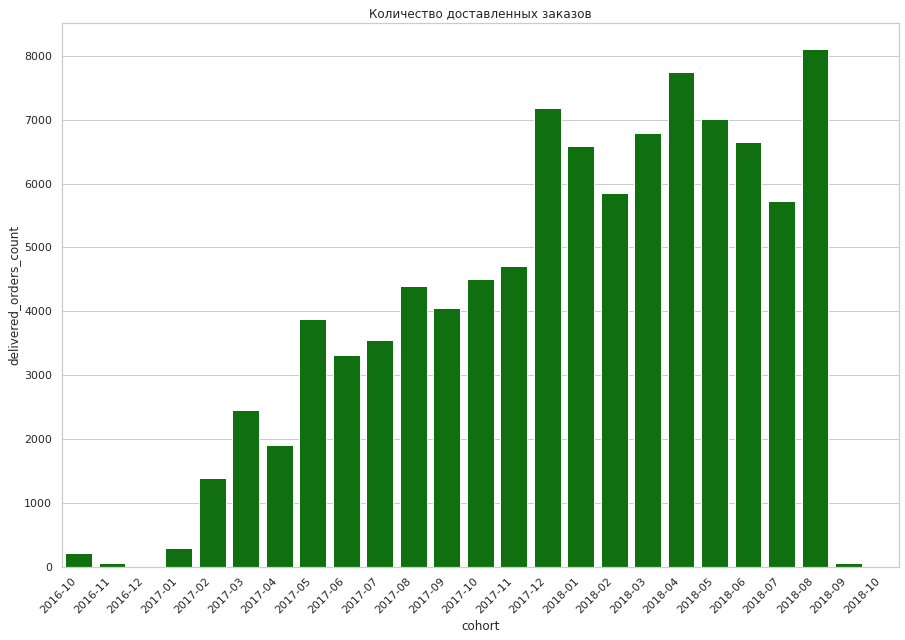

In [117]:
plt.figure(figsize=(15,10)) # регулировка размерности графика
sns.set_theme(style="whitegrid") # Устанавливаем стиль для более элегантных графиков

plot = sns.barplot(data = lineplot, x = 'cohort', y = 'delivered_orders', color='green')
plt.title('Количество доставленных заказов')
plot.set_xticklabels(plot.get_xticklabels(), rotation=45, ha='right')
plt.ylabel('delivered_orders_count')

<span style="font-size: 18px;">
Средний чек клиента составляет 4116 у.е., метрика практически не меняется с течением времени.
</span>

Text(0, 0.5, 'avg_bill')

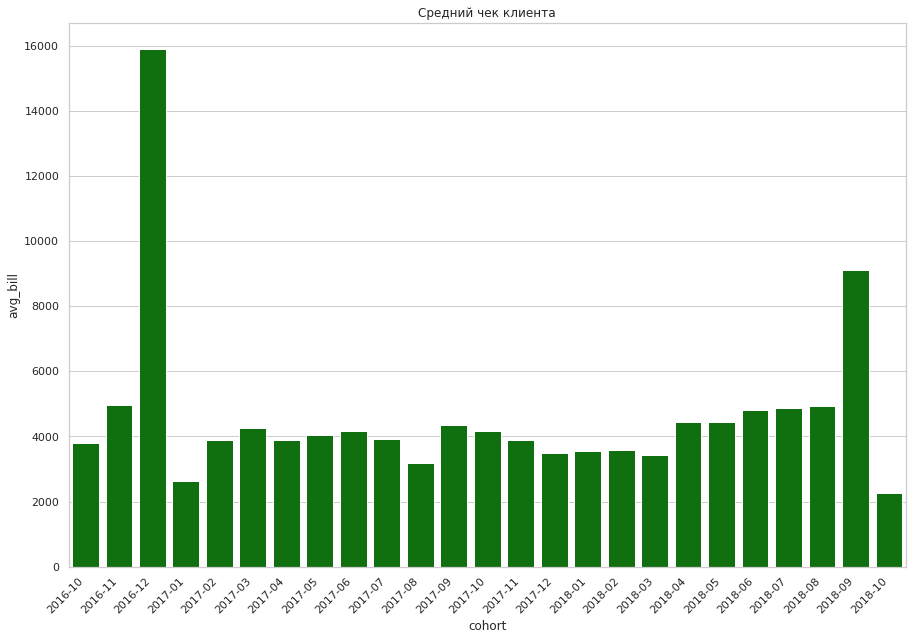

In [119]:
plt.figure(figsize=(15,10)) # регулировка размерности графика
sns.set_theme(style="whitegrid") # Устанавливаем стиль для более элегантных графиков

plot = sns.barplot(data = revenue_per_customer_plot, x = 'cohort', y = 'avg_bill', color='green')
plt.title('Средний чек клиента')
plot.set_xticklabels(plot.get_xticklabels(), rotation=45, ha='right')
plt.xlabel('cohort')
plt.ylabel('avg_bill')

<span style="font-size: 18px;">
Анализ показал, что у маркетплейса отсутствует PMF. Очень вероятно, что при масштабировании возникнут убытки,
поэтому не рекомендуется на данном этапе проводить масштабирование.
</span>

<span style="font-size: 18px;">
По результатам проведённого анализа были сформулированы 3 основные гипотезы, которые помогут увеличить метрики.
Каждая из них позволит нарастить новых или постоянных клиентов. 
</span>

<span style="font-size: 18px;">
Гипотеза 1
    
Если исправим баг в системе процессинга заказов, то клиентам не придётся сталкиваться с 
проблемой отмены заказа, вследствие чего количество доставленных заказов увеличится. Считаем, 
что мы таким образом избавимся от всех отмен.
</span>

<span style="font-size: 18px;">
Гипотеза 2
    
Если сократим время до отгрузки заказа, то клиенты перестанут получать свой заказ с 
запаздыванием, вследствие чего количество заказов увеличится за счёт повторных заказов.
</span>

<span style="font-size: 18px;">
Гипотеза 3
    
Если создадим новый способ оплаты, который будет конвертировать клиентов в повторный заказ, 
то клиенты не будут испытывать трудности при оформлении заказа, вследствие чего количество 
заказов увеличится за счёт повторных заказов тех, кто раньше не делал повторный заказ.
</span>

<span style="font-size: 18px;">
С помощью методологии ICE приоритетной была выбрана гипотеза 1. 
Её реализация позволит конвертировать заказы уже заинтересованных в покупке клиентов в успешные.
Также починка багов является первоочередной задачей, т.к. баги негативно влияют на пользовательский путь 
и ухудшают воронку. Критичный баг может влиять на клиента сильнее с негативной точки зрения.
Далее в порядке приоритетности можно реализовать гипотезы 3,2 на увеличение количества повторных заказов 
и, как следствие, метрики retention. 
</span>

<span style="font-size: 18px;">
Для проверки эффективности гипотезы 1 рекомендуется использовать A/B-тестирование перед её масштабной реализацией.
</span>

<span style="font-size: 18px;">
Реализация гипотезы 1 повлияет на метрики:
    
* целевые:
    - конверсия в успешный заказ;
      
Достоверность - легко посчитать по имеющимся данным.
Интерпретируемость - чем выше конверсия в успешный заказ, тем меньше отмененных заказов.
Чувствительность - при отсутствии бага клиенты смогут получить свой заказ, соответственно метрика увеличится; 
конверсионные метрики хорошо реагируют на изменения и подходят для экспериментов.

* прокси:   
    - среднее количество заказов на одного клиента.
      
Достоверность - легко посчитать по имеющимся данным.
Интерпретируемость - увеличение количества заказов показывает положительную динамику от изменений.
Чувствительность - среднее хорошо отражает изменения.
</span>

<span style="font-size: 18px;">
После успешного проведения A/B-тестирования можно реализовывать функционал на весь маркетплейс. 
</span>